## Import Data

In [88]:
import os.path as op
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as pyplot

import time

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#path_to_data = op.relpath("/modules/cs342/Assignment2/")
path_to_data = "./data"

start_time = time.time()

light_curves = pd.read_csv(path_to_data + "/training_set.csv")
metadata     = pd.read_csv(path_to_data + "/training_set_metadata.csv")

target = metadata["target"]
metadata = metadata.drop("target", axis = 1)

print time.time() - start_time

1.23355603218


## Manipulate Data

In [86]:
training_set = metadata.copy()

curves_index = 0
time_in_loc = 0

start_time = time.time()

curves_subdf = pd.DataFrame(columns=["u_band", "g_band", "r_band", "i_band", "z_band", "y_band"], index=xrange(len(training_set)))

for i, current_id in enumerate(metadata["object_id"]):
    start_index = curves_index
    while light_curves.at[curves_index,"object_id"] == current_id:
        curves_index += 1
        if curves_index == len(light_curves): break
        
    sub_curves = light_curves.loc[start_index:curves_index-1, :].drop("object_id", axis=1)
    # set t=0 to first observation
    sub_curves["mjd"] -= sub_curves.at[start_index,"mjd"]
    curves_subdf.at[i,"u_band"] = sub_curves[sub_curves.passband == 0].drop("passband", axis=1).values
    curves_subdf.at[i,"g_band"] = sub_curves[sub_curves.passband == 1].drop("passband", axis=1).values
    curves_subdf.at[i,"r_band"] = sub_curves[sub_curves.passband == 2].drop("passband", axis=1).values
    curves_subdf.at[i,"i_band"] = sub_curves[sub_curves.passband == 3].drop("passband", axis=1).values
    curves_subdf.at[i,"z_band"] = sub_curves[sub_curves.passband == 4].drop("passband", axis=1).values
    curves_subdf.at[i,"y_band"] = sub_curves[sub_curves.passband == 5].drop("passband", axis=1).values

training_set = pd.concat([
    training_set,
    curves_subdf
], sort=False, axis=1)
    
print time.time() - start_time


95.5333769321


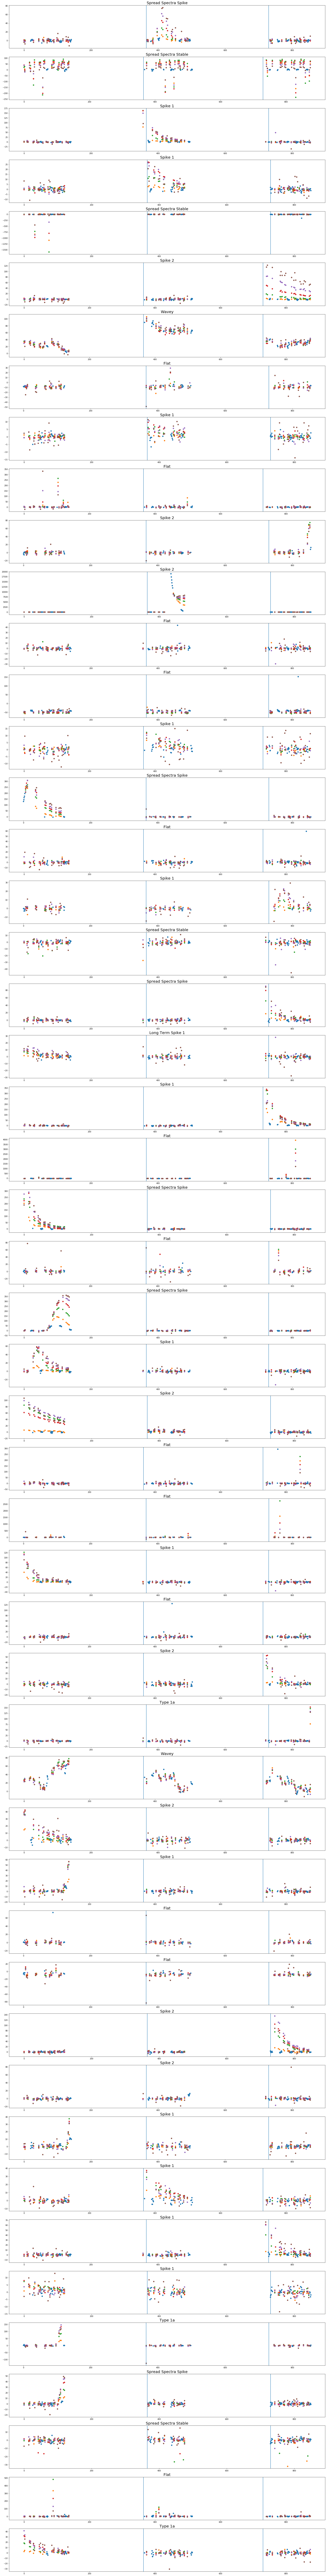

In [119]:
def num_to_desc(n):
    if n == 90: return "Spike 1"
    if n == 42: return "Spike 2"
    if n == 92: return "Chaos"
    if n == 65: return "Flat"
    if n == 88: return "Wavey"
    if n == 16: return "Spread Spectra Stable"
    if n == 62: return "Spread Spectra Spike"
    if n == 15: return "Linear Spike"
    if n == 52: return "Long Term Spike 1"
    if n == 95: return "Long Term Spike 2"
    if n == 67: return "Type 1a"
    
    return n

num_cases = 50
start_case = 300

f, axes = pyplot.subplots(num_cases, 1)
f.set_size_inches(30,5*num_cases)

for i in range(num_cases):
    index = start_case + i
    axes[i].set_facecolor((1.0,1.0,1.0,0.1))
    axes[i].set_title(num_to_desc(target.values[index]), fontsize=20)
    axes[i].scatter(training_set.at[index,"u_band"][:,0], training_set.at[index,"u_band"][:,1])
    axes[i].scatter(training_set.at[index,"g_band"][:,0], training_set.at[index,"g_band"][:,1])
    axes[i].scatter(training_set.at[index,"r_band"][:,0], training_set.at[index,"r_band"][:,1])
    axes[i].scatter(training_set.at[index,"i_band"][:,0], training_set.at[index,"i_band"][:,1])
    axes[i].scatter(training_set.at[index,"z_band"][:,0], training_set.at[index,"z_band"][:,1])
    axes[i].scatter(training_set.at[index,"y_band"][:,0], training_set.at[index,"y_band"][:,1])
    axes[i].axvline(x=365)
    axes[i].axvline(x=2*365)
